In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Méthode des rectangles

In [3]:
def rectangleGauche(f, a, b, n):
    s = 0
    pas = (b - a)/n
    x = a
    for k in range(n):
        s = s + f(x) * pas
        x = x + pas
    return s

def rectangleGauche2(f, a, b, n):
    s = 0
    pas = (b - a) / n
    for k in range(n):
        s = s + f(a + k * pas) * pas
    return s

def rectangleGaucheDessin(f, a, b, n):
    s = 0
    pas = (b - a)/n
    x = a
    for k in range(n):
        s = s + f(x) * pas
        plt.fill([x, x + pas, x + pas, x, x], [0] * 2 + [f(x)] * 2 + [0], hatch='/',edgecolor='black', facecolor='none')
        x = x + pas        
    lesx = np.linspace(a, b, 1000)  
    fvect = np.vectorize(f)
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',a))
    plt.plot(lesx, fvect(lesx), color='black')
    plt.title(r"Rectangles à gauche $\int_{%d}^{%d}f(x)dx\approx$%1.3f"%(a,b,s))
    plt.savefig('methodeRectangleGauche-{}-{}-{}-{}subdivisions.eps'.format(f.__name__,a,b,n))
    plt.show()
    return s

In [4]:
def rectangleDroite(f, a, b, n):
    s = 0
    pas = (b - a)/n
    x = a + pas
    for k in range(n):
        s = s + f(x) * pas
        x = x + pas
    return s

def rectangleDroite2(f, a, b, n):
    s = 0
    pas = (b - a) / n
    for k in range(1, n + 1):
        s = s + f(a + k * pas) * pas
    return s

def rectangleDroiteDessin(f, a, b, n):
    s = 0
    pas = (b - a)/n
    x = a
    for k in range(n):
        s = s + f(x + pas) * pas
        plt.fill([x, x + pas, x + pas, x, x], [0] * 2 + [f(x+pas)] * 2 + [0], hatch='/',edgecolor='black', facecolor='none')
        x = x + pas        
    lesx = np.linspace(a, b, 1000)  
    fvect = np.vectorize(f)
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',a))
    plt.plot(lesx, fvect(lesx), color='black')
    plt.title(r"Rectangles à droite $\int_{%d}^{%d}f(x)dx\approx$%1.3f"%(a,b,s))
    plt.savefig('methodeRectangleDroite-{}-{}-{}-{}subdivisions.eps'.format(f.__name__,a,b,n))
    plt.show()
    return s

In [5]:
def inverse(x):
    return 1 / x

In [6]:
inverse.__name__

'inverse'

In [7]:
rectangleGauche(inverse, 1, 2, 10)

0.7187714031754279

In [8]:
rectangleGauche2(inverse, 1, 2, 10)

0.718771403175428

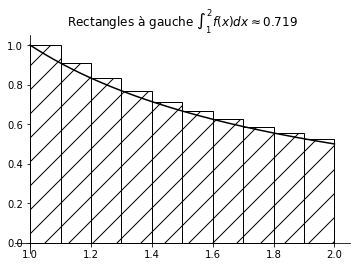

0.7187714031754279

In [9]:
rectangleGaucheDessin(inverse,1,2,10)

In [10]:
def carre(x):
    return x ** 2

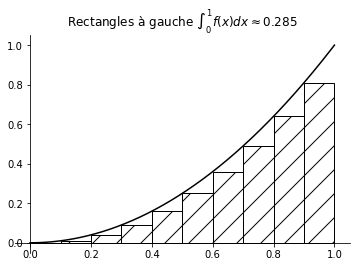

0.2849999999999999

In [11]:
rectangleGaucheDessin(carre,0,1,10)

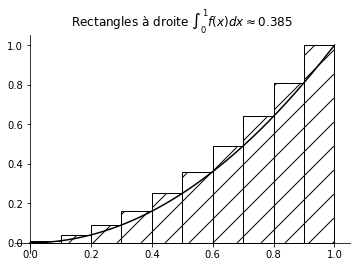

0.3849999999999999

In [12]:
rectangleDroiteDessin(carre, 0, 1, 10)

## Méthode Monte-Carlo

In [92]:
from random import random
import scipy.integrate

def monte_carlo(f, a, b,  n):
    """Retourne la valeur approchée de l'intégrale de f entre a et b par la méthode
    des rectangles à gauche, avec n subdivisions"""
    fvect = np.vectorize(f)
    x = np.linspace(a, b, 101)
    plt.figure(figsize=(10,10),dpi=80)
    plt.plot(x, fvect(x),linewidth = 5,linestyle='dashed')
    plt.xlim(a, b)
    plt.ylim(a, b)
    domaine = 0
    x = []
    y = []
    x2 = []
    y2 = []
    for k in range(n):
        (xp, yp) = (random(), random())
        if yp <= fvect(xp):
            domaine += 1
            x.append(xp)
            y.append(yp)
        else:
            x2.append(xp)
            y2.append(yp)
    plt.scatter(x, y, marker='o', facecolor='k')
    plt.scatter(x2, y2, marker='o', facecolor='w',edgecolor='k')
    aire = domaine/n
    erreur = abs(aire - scipy.integrate.quad(fvect, 0, 1)[0])
    plt.title(r"""Approximation de $\int_{%d}^{%d}%s \, dx$ par la méthode de Monte-Carlo avec %d points"""%(a, b, f.__doc__,  n),fontdict={'fontsize' : 14,  'verticalalignment' : 'bottom'})
    plt.savefig("Methode-Monte-Carlo-n={:d}.png".format(n))
    return aire, erreur

e^{-x^2/2}


(0.87, 0.01437560810785099)

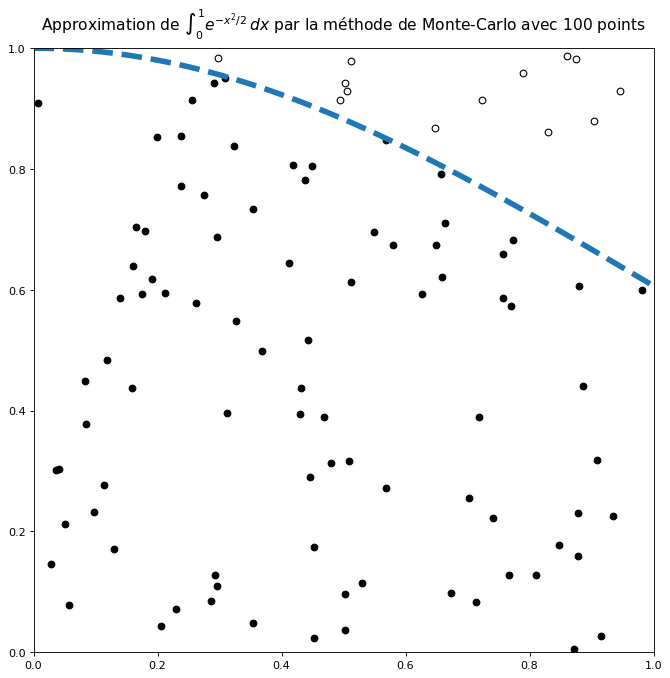

In [93]:
def f(x):
    r"e^{-x^2/2}"
    return np.exp(- x ** 2/2)
print(f.__doc__)
monte_carlo(f, 0, 1, 100)

In [43]:
scipy.integrate.quad(f, 0, 1)[0]

0.855624391892149

In [46]:
plt.scatter?

## Animation Méthode de Monte Carlo 

Approximation de l'intégrale $\int_{0}^{1}\text{e}^{-\frac{x^{2}}{2}}\text{dx}$ par la méthode de Monte-carlo

In [86]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML


def f(x):
    r"e^{-x^2/2}"
    return np.exp(- x ** 2/2)

NFrames = 1000

fig, ax1 = plt.subplots(1, 1,figsize=(15, 6))

#ax1
t = np.linspace(0, 1, 1000)
ax1.plot(t, np.exp(-t**2/2), color='black',linestyle='dashed', linewidth='5', label=r'$y=e^{-\frac{x^{2}}{2}}$')

#données animation
nuage1, = ax1.plot([],[],marker='o', linestyle='', color='k')
nuage2, = ax1.plot([],[],marker='o', linestyle='',color='r')
xpoints1 = []
ypoints1 = []
xpoints2 = []
ypoints2 = []

#Positionnement des axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['bottom'].set_position(('data',0))
ax1.yaxis.set_ticks_position('left')
ax1.spines['left'].set_position(('data',0))
ax1.set_ylim((0, 1))

valeur_exacte =  scipy.integrate.quad(f, 0, 1)[0]
nbpoints = 0

def init():
    nuage1.set_data([], [])
    nuage2.set_data([], [])
    return (nuage1, nuage2) 

def animate(i):
    global nbpoints
    x, y = np.random.random(), np.random.random()
    if y <= f(x):
        xpoints1.append(x)
        ypoints1.append(y)
    else:
        xpoints2.append(x)
        ypoints2.append(y)
    nuage1.set_data(xpoints1, ypoints1)
    nuage2.set_data(xpoints2, ypoints2)
    nbpoints += 1
    aire = len(xpoints1) / nbpoints
    ax1.set_title(r"""Approximation de $\int_{0}^{1}%s \, dx \approx$ %.5f par la méthode de Monte-Carlo avec %d points  Erreur $\approx$ %.5f"""%(f.__doc__, aire,  nbpoints, abs(aire - valeur_exacte)))
    return (nuage1,nuage2)
  

plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=NFrames,init_func=init,blit=False,interval=100)
# l'un ou l'autre
#HTML(ani.to_jshtml())
HTML(ani.to_html5_video())


